In [10]:
## Import Packages
import numpy as np
import _pickle as pk
import AA as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import os 

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [17]:
Source = '/Users/johnvirgin/OneDrive - University of Waterloo/Papers/GMD_CanESM/Data/'

In [18]:
#load in cloud feedbacks and dimensions as needed
Models = ['CanESM2','CanESM5_p2','CanESM5_p6']

data_sw = dict()
data_lw = dict()
for m in range(3):
    data_sw[Models[m]] = pk.load(open(\
    Source+Models[m]+'/Fluxes/'+Models[m]+'_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
    
    data_lw[Models[m]] = pk.load(open(\
    Source+Models[m]+'/Fluxes/'+Models[m]+'_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [19]:
data_sw_plot = dict()
data_lw_plot = dict()
data_lw_gam = dict()
data_sw_gam = dict()
for mods in data_sw.keys():
    data_sw_plot[mods] = dict()
    data_lw_plot[mods] = dict()
    
    data_sw_gam[mods] = dict()
    data_lw_gam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_plot[mods][prop] = dict()
        data_lw_plot[mods][prop] = dict()
        
        data_sw_gam[mods][prop] = dict()
        data_lw_gam[mods][prop] = dict()
        
        for ctp in data_sw[mods][prop].keys():
            data_sw_gam[mods][prop][ctp] = np.average(data_sw[mods][prop][ctp],weights=coslat)
            data_lw_gam[mods][prop][ctp] = np.average(data_lw[mods][prop][ctp],weights=coslat)
            
            data_sw_plot[mods][prop][ctp] = np.concatenate((\
            data_sw[mods][prop][ctp][:,64:],data_sw[mods][prop][ctp][:,0:64]),axis=1)
            
            data_sw_plot[mods][prop][ctp],lon_cyc = add_cyclic_point(\
            data_sw_plot[mods][prop][ctp],lon)
            
            data_lw_plot[mods][prop][ctp] = np.concatenate((\
            data_lw[mods][prop][ctp][:,64:],data_lw[mods][prop][ctp][:,0:64]),axis=1)
            
            data_lw_plot[mods][prop][ctp],lon_cyc = add_cyclic_point(\
            data_lw_plot[mods][prop][ctp],lon)

Low Cloud Amount & High Cloud Optical Depth

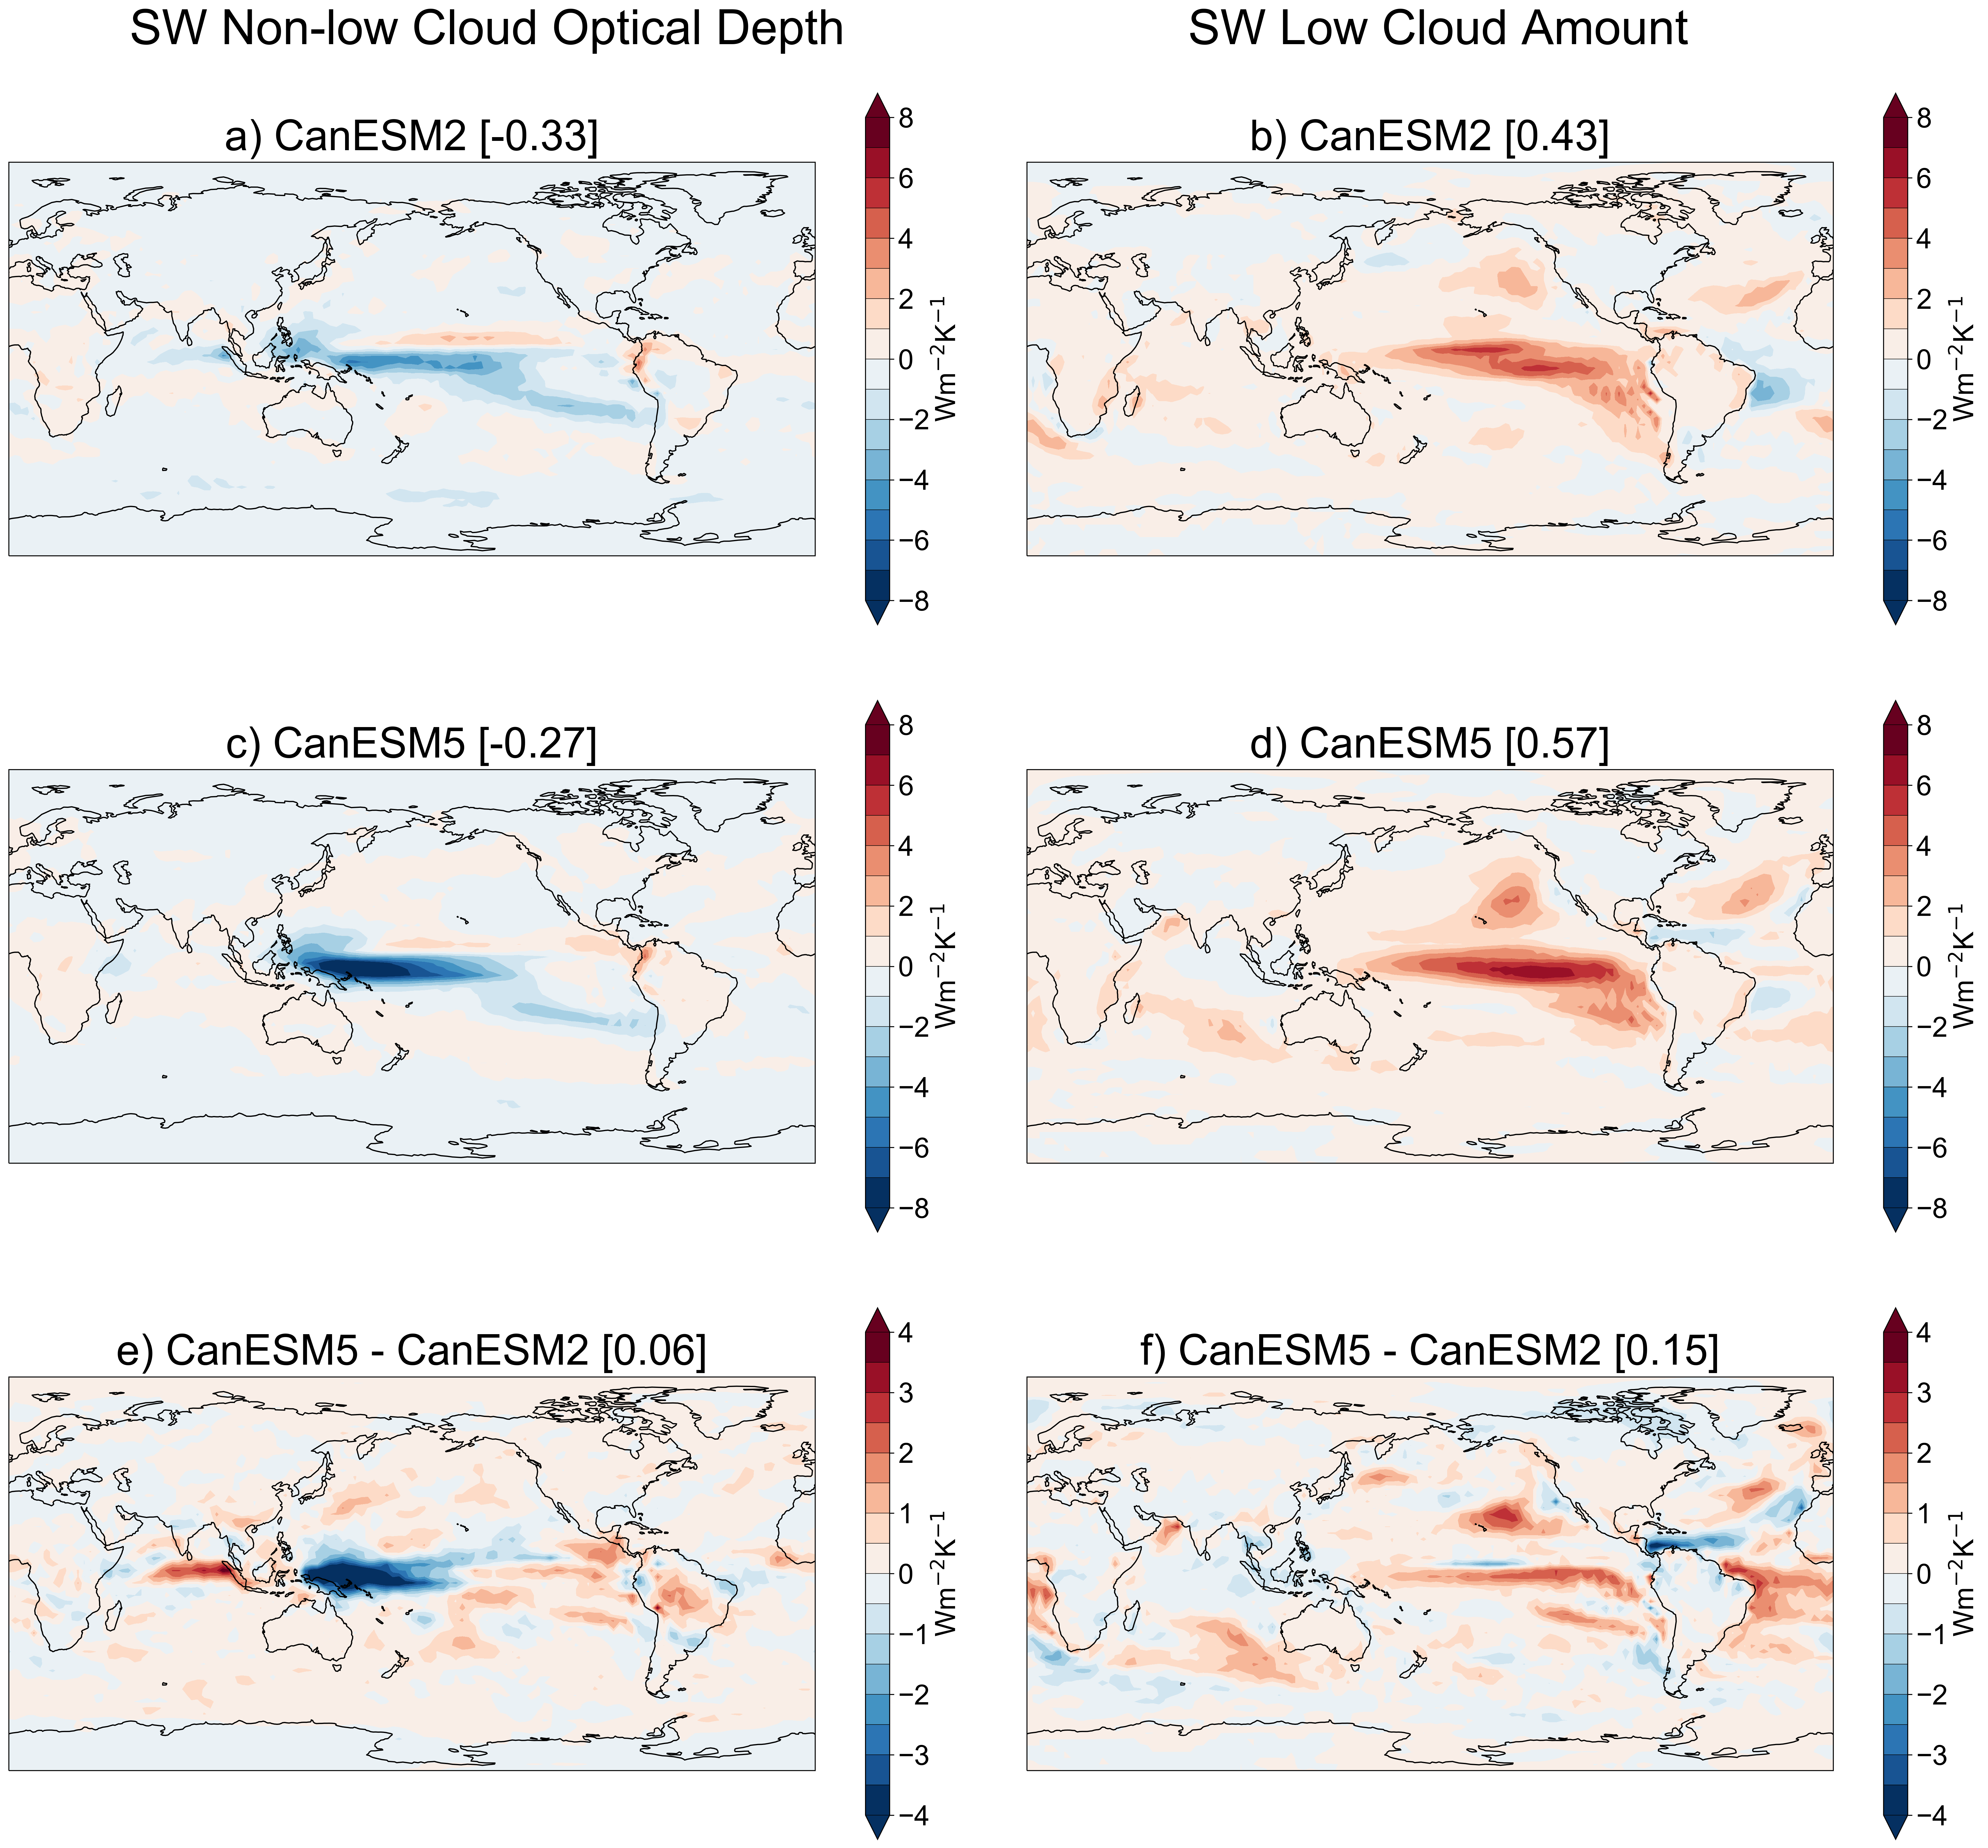

In [22]:
mpl.rc('font',size=23,**{'family':'sans-serif','sans-serif':['Arial']})
bounds = np.arange(-8,8.1,1)
bounds_ticks = np.arange(-8,8.1,2)
cmap = plt.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_diff = np.arange(-4,4.1,0.5)
bounds_diff_ticks = np.arange(-4,4.1,1)
norm_diff = mpl.colors.BoundaryNorm(bounds_diff, cmap.N)

fig = plt.figure(figsize=(30,30),dpi=300)
#gs = gridspec.GridSpec(3,2, width_ratios=[0.6,1],height_ratios=[1,1,1]) 

#CanESM2------------------
ax = plt.subplot(321,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('a) CanESM2 [{}]'.format(round(data_sw_gam['CanESM2']['Optical Depth']['Hi'],2)),\
             fontsize=35,pad=10)
im = ax.contourf(lon_cyc,lat,data_sw_plot['CanESM2']['Optical Depth']['Hi'],\
                   bounds,cmap=cmap,norm=norm,extend='both')
ax.coastlines()
plt.colorbar(im,ticks=bounds_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)
plt.text(0.15,1.3,'SW Non-low Cloud Optical Depth',fontsize=40,transform = ax.transAxes)

ax1 = plt.subplot(322,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('b) CanESM2 [{}]'.format(round(data_sw_gam['CanESM2']['Amount']['Low'],2)),\
             fontsize=35,pad=10)
im1 = ax1.contourf(lon_cyc,lat,data_sw_plot['CanESM2']['Amount']['Low'],\
                   bounds,cmap=cmap,norm=norm,extend='both')
ax1.coastlines()
plt.colorbar(im1,ticks=bounds_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)
plt.text(0.2,1.3,'SW Low Cloud Amount',fontsize=40,transform = ax1.transAxes)

#CanESM5------
ax2 = plt.subplot(323,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('c) CanESM5 [{}]'.format(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Hi'],2)),\
             fontsize=35,pad=10)
im2 = ax2.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Optical Depth']['Hi'],\
                   bounds,cmap=cmap,norm=norm,extend='both')
ax2.coastlines()
plt.colorbar(im2,ticks=bounds_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

ax3 = plt.subplot(324,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_title('d) CanESM5 [{}]'.format(round(data_sw_gam['CanESM5_p2']['Amount']['Low'],2)),\
             fontsize=35,pad=10)
im3 = ax3.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Amount']['Low'],\
                   bounds,cmap=cmap,norm=norm,extend='both')
ax3.coastlines()
plt.colorbar(im3,ticks=bounds_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)


#differences-----
ax4 = plt.subplot(325,projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_title('e) CanESM5 - CanESM2 [{}]'.format(round(\
    data_sw_gam['CanESM5_p2']['Optical Depth']['Hi']-\
    data_sw_gam['CanESM2']['Optical Depth']['Hi'],2)),fontsize=35,pad=10)
im4 = ax4.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Optical Depth']['Hi']-\
                   data_sw_plot['CanESM2']['Optical Depth']['Hi'],\
                   bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax4.coastlines()
plt.colorbar(im4,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

ax5 = plt.subplot(326,projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_title('f) CanESM5 - CanESM2 [{}]'.format(round(\
    data_sw_gam['CanESM5_p2']['Amount']['Low']-data_sw_gam['CanESM2']['Amount']['Low'],2)),\
             fontsize=35,pad=10)
im5 = ax5.contourf(lon_cyc,lat,data_sw_plot['CanESM5_p2']['Amount']['Low']-\
                   data_sw_plot['CanESM2']['Amount']['Low'],\
                   bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax5.coastlines()
plt.colorbar(im4,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

plt.subplots_adjust(wspace=0.01, hspace=-0.2)

plt.savefig('CLD_LowAmtHiOpt_FB_Map.png',bbox_inches='tight')